In [1]:
import os
import numpy as np
import tensorflow as tf
from tqdm import tqdm
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
import random
import pickle
import cv2
from tensorflow import keras
from tensorflow.keras.applications import ResNet50
import tensorflow_hub as hub
from keras.applications.mobilenet_v2 import MobileNetV2
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential, Model

In [2]:
"""
from google.colab import drive
drive.mount('/content/drive')
"""

ModuleNotFoundError: No module named 'google.colab'

In [ ]:
#!ls "/content/drive/My Drive/"

In [2]:
img_height, img_width, img_channels = 224,224,3
batch_size=32
train_ds = "../Data/images/training"
test_data_dir = "../Data/images/testing"
loading_dataste_seed = 0

In [3]:

train_set = tf.keras.preprocessing.image_dataset_from_directory(
    train_ds,
    validation_split=0.2,
    subset="training",
    seed=loading_dataste_seed,
    image_size=(img_height, img_width),
    batch_size=batch_size
)

Found 2392 files belonging to 2 classes.
Using 1914 files for training.


In [4]:
validation_set = tf.keras.preprocessing.image_dataset_from_directory(
    train_ds,
    validation_split=0.2,
    subset="validation",
    seed=loading_dataste_seed,
    image_size=(img_height, img_width),
    batch_size=batch_size
)

Found 2392 files belonging to 2 classes.
Using 478 files for validation.


In [5]:
test_set = tf.keras.preprocessing.image_dataset_from_directory(
    test_data_dir,
    seed=loading_dataste_seed,
    image_size=(img_height, img_width),
    batch_size=batch_size
)

Found 597 files belonging to 2 classes.


In [6]:
def evaluate_model(model, test_data):
    results = {}

    predicted_labels = []
    true_labels = []
    all_images = []
    for images, labels in test_data:
        true_labels.extend(labels.numpy())
        predicted_labels.extend(tf.argmax(model.predict(images), axis=1).numpy())

    # Accuracy
    results['accuracy'] = accuracy_score(true_labels, predicted_labels)

    # F1 Score
    results['f1_score'] = f1_score(true_labels, predicted_labels)

    cm = confusion_matrix(true_labels, predicted_labels)
    print(cm)
    print("F1 score",results['f1_score'])
    print("Accuracy",results['accuracy'])



    return results

CNN MODEL

In [7]:
model=tf.keras.Sequential([
    tf.keras.layers.Conv2D(32,(3,3),activation='relu',input_shape=(224,224,3)),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.BatchNormalization(),
    #tf.keras.layers.Conv2D(64,(3,3),activation='relu'),
    #tf.keras.layers.MaxPooling2D(),
    #tf.keras.layers.BatchNormalization(),
    #tf.keras.layers.Conv2D(128,(3,3),activation='relu'),
    #tf.keras.layers.MaxPooling2D(),
    #
    #tf.keras.layers.Conv2D(256,(3,3),activation='relu'),
    #tf.keras.layers.MaxPooling2D(2,2),
    #tf.keras.layers.BatchNormalization(),
    #tf.keras.layers.Conv2D(512,(3,3),activation='relu'),
    #tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64,activation='relu'),
    tf.keras.layers.Dense(2,activation='softmax')
])
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 111, 111, 32)     0         
 )                                                               
                                                                 
 batch_normalization (BatchN  (None, 111, 111, 32)     128       
 ormalization)                                                   
                                                                 
 flatten (Flatten)           (None, 394272)            0         
                                                                 
 dense (Dense)               (None, 64)                25233472  
                                                                 
 dense_1 (Dense)             (None, 2)                 1

In [8]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [9]:
custom_model_history = model.fit(train_set,validation_data=validation_set,epochs=10)

Epoch 1/10
60/60 [==============================] - 66s 902ms/step - loss: 7.3870 - accuracy: 0.6191 - val_loss: 0.7074 - val_accuracy: 0.5565
Epoch 2/10
60/60 [==============================] - 48s 778ms/step - loss: 0.4975 - accuracy: 0.7868 - val_loss: 0.6681 - val_accuracy: 0.5628
Epoch 3/10
60/60 [==============================] - 48s 781ms/step - loss: 0.4422 - accuracy: 0.8250 - val_loss: 0.5839 - val_accuracy: 0.6736
Epoch 4/10
60/60 [==============================] - 48s 785ms/step - loss: 0.3724 - accuracy: 0.8474 - val_loss: 0.4995 - val_accuracy: 0.8724
Epoch 5/10
60/60 [==============================] - 49s 795ms/step - loss: 0.2239 - accuracy: 0.9143 - val_loss: 0.2255 - val_accuracy: 0.9205
Epoch 6/10
60/60 [==============================] - 48s 788ms/step - loss: 0.1491 - accuracy: 0.9373 - val_loss: 0.0508 - val_accuracy: 0.9812
Epoch 7/10
60/60 [==============================] - 49s 800ms/step - loss: 0.0724 - accuracy: 0.9754 - val_loss: 0.0467 - val_accuracy: 0.9791

#fig1 = plt.gcf()
plt.plot(custom_model_history.history['accuracy'])
plt.plot(custom_model_history.history['val_accuracy'])
plt.title('CNN Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'validation'])
plt.show()

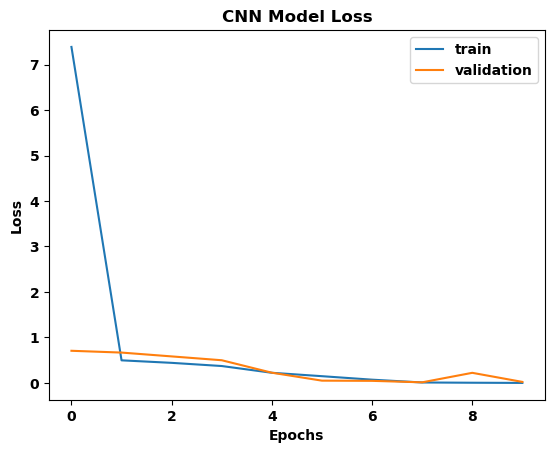

In [10]:
plt.plot(custom_model_history.history['loss'])
plt.plot(custom_model_history.history['val_loss'])
plt.title('CNN Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'validation'])
plt.show()

In [11]:
custom_model_evaluation = evaluate_model(model, test_set)

1/1 [==============================] - 0s 257ms/step
[[284   6]
 [  0 307]]
F1 score 0.9903225806451613
Accuracy 0.9899497487437185


In [12]:
cnn_model = '../Final_model/cnn_model.h5'
pickle.dump(model, open(cnn_model, 'wb'))
model.save(cnn_model)
cnn_model_size = format((os.path.getsize(cnn_model)/(1024*1024)),".2f")
print("CNN Model:",cnn_model_size,"MB")

INFO:tensorflow:Assets written to: ram://b793cb67-6058-45e3-a29a-f82e783fdfef/assets


INFO:tensorflow:Assets written to: ram://b793cb67-6058-45e3-a29a-f82e783fdfef/assets


CNN Model: 288.83 MB


ResNet Model

In [13]:
base_model = ResNet50(weights= 'imagenet', include_top=False, input_shape= (224,224,3), classes=2)
for layer in base_model.layers:
    layer.trainable=False

In [14]:
resnet_model= Sequential()
resnet_model.add(base_model)
resnet_model.add(tf.keras.layers.BatchNormalization())
#resnet_model.add(tf.keras.layers.Conv2D(256,(3,3),activation='relu'))
#resnet_model.add(tf.keras.layers.BatchNormalization())
resnet_model.add(tf.keras.layers.Flatten())
resnet_model.add(tf.keras.layers.Dense(512, activation='relu'))
resnet_model.add(tf.keras.layers.Dense(2, activation='softmax'))
resnet_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 7, 7, 2048)        23587712  
                                                                 
 batch_normalization_1 (Batc  (None, 7, 7, 2048)       8192      
 hNormalization)                                                 
                                                                 
 flatten_1 (Flatten)         (None, 100352)            0         
                                                                 
 dense_2 (Dense)             (None, 512)               51380736  
                                                                 
 dense_3 (Dense)             (None, 2)                 1026      
                                                                 
Total params: 74,977,666
Trainable params: 51,385,858
Non-trainable params: 23,591,808
_________________________________

In [15]:
resnet_model.compile(optimizer='Adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [16]:
resnet_model_history = resnet_model.fit(train_set,validation_data=validation_set,epochs=10)

Epoch 1/10
60/60 [==============================] - 268s 4s/step - loss: 4.4375 - accuracy: 0.9044 - val_loss: 2.9950 - val_accuracy: 0.9163
Epoch 2/10
60/60 [==============================] - 257s 4s/step - loss: 0.3600 - accuracy: 0.9859 - val_loss: 0.5272 - val_accuracy: 0.9833
Epoch 3/10
60/60 [==============================] - 260s 4s/step - loss: 0.1577 - accuracy: 0.9885 - val_loss: 0.6989 - val_accuracy: 0.9770
Epoch 4/10
60/60 [==============================] - 267s 4s/step - loss: 0.0402 - accuracy: 0.9969 - val_loss: 0.2969 - val_accuracy: 0.9833
Epoch 5/10
60/60 [==============================] - 259s 4s/step - loss: 0.0395 - accuracy: 0.9953 - val_loss: 0.3022 - val_accuracy: 0.9833
Epoch 6/10
60/60 [==============================] - 259s 4s/step - loss: 0.0968 - accuracy: 0.9906 - val_loss: 0.2791 - val_accuracy: 0.9874
Epoch 7/10
60/60 [==============================] - 261s 4s/step - loss: 0.3178 - accuracy: 0.9822 - val_loss: 0.3216 - val_accuracy: 0.9833
Epoch 8/10
60

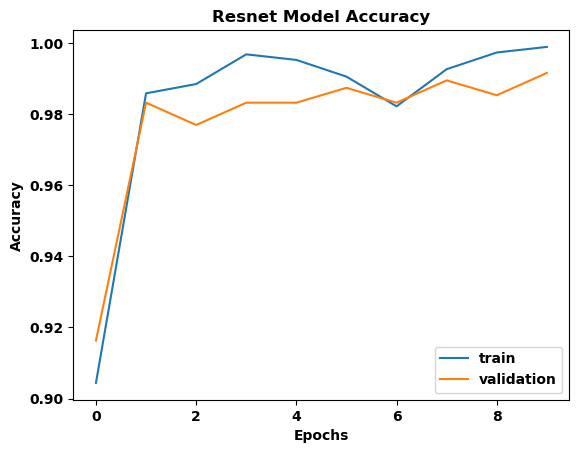

In [17]:
fig1 = plt.gcf()
plt.plot(resnet_model_history.history['accuracy'])
plt.plot(resnet_model_history.history['val_accuracy'])
plt.title('Resnet Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'validation'])
plt.show()

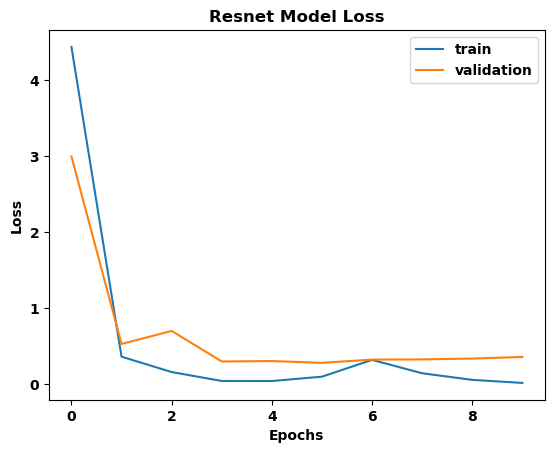

In [18]:
plt.plot(resnet_model_history.history['loss'])
plt.plot(resnet_model_history.history['val_loss'])

plt.title('Resnet Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'validation'])
plt.show()

In [19]:
resnet_model_evaluation = evaluate_model(resnet_model, test_set)

1/1 [==============================] - 4s 4s/step
[[284   6]
 [  1 306]]
F1 score 0.9886914378029078
Accuracy 0.9882747068676717


In [20]:
res_model_path = '../Final_model/res_model.h5'
pickle.dump(resnet_model, open(res_model_path, 'wb'))
resnet_model.save(res_model_path)
res_model_size = format((os.path.getsize(res_model_path)/(1024*1024)),".2f")
print("Resnet Model:",res_model_size,"MB")

INFO:tensorflow:Assets written to: ram://17a5ab86-c0d8-4ab0-b519-2b708b224044/assets


INFO:tensorflow:Assets written to: ram://17a5ab86-c0d8-4ab0-b519-2b708b224044/assets


Resnet Model: 678.39 MB


Mobile Net Model

In [21]:
mobilnet_base_model =  tf.keras.applications.mobilenet_v2.MobileNetV2(include_top='false',input_shape=(224,224,3),pooling='avg',weights='imagenet')

In [22]:
mobile_net_layers = hub.KerasLayer(mobilnet_base_model, input_shape=(224,224,3))
mobile_net_layers.trainable = False

In [23]:
mobilenet_model= Sequential()
mobilenet_model.add(mobile_net_layers)
mobilenet_model.add(tf.keras.layers.Flatten())
mobilenet_model.add(tf.keras.layers.Dropout(0.3))
mobilenet_model.add(tf.keras.layers.Dense(64, activation='relu'))
mobilenet_model.add(tf.keras.layers.Dense(2, activation='softmax'))
mobilenet_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 1000)              3538984   
                                                                 
 flatten_2 (Flatten)         (None, 1000)              0         
                                                                 
 dropout (Dropout)           (None, 1000)              0         
                                                                 
 dense_4 (Dense)             (None, 64)                64064     
                                                                 
 dense_5 (Dense)             (None, 2)                 130       
                                                                 
Total params: 3,603,178
Trainable params: 64,194
Non-trainable params: 3,538,984
_________________________________________________________________


In [24]:
mobilenet_model.compile(optimizer='Adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [25]:
mobilenet_history = mobilenet_model.fit(train_set,validation_data=validation_set,epochs=10)

Epoch 1/10
60/60 [==============================] - 180s 2s/step - loss: 0.6918 - accuracy: 0.5350 - val_loss: 0.6871 - val_accuracy: 0.5837
Epoch 2/10
60/60 [==============================] - 71s 1s/step - loss: 0.6869 - accuracy: 0.5413 - val_loss: 0.6816 - val_accuracy: 0.5983
Epoch 3/10
60/60 [==============================] - 72s 1s/step - loss: 0.6817 - accuracy: 0.5763 - val_loss: 0.6733 - val_accuracy: 0.6297
Epoch 4/10
60/60 [==============================] - 69s 1s/step - loss: 0.6719 - accuracy: 0.6181 - val_loss: 0.6631 - val_accuracy: 0.6548
Epoch 5/10
60/60 [==============================] - 70s 1s/step - loss: 0.6596 - accuracy: 0.6327 - val_loss: 0.6537 - val_accuracy: 0.6778
Epoch 6/10
60/60 [==============================] - 69s 1s/step - loss: 0.6503 - accuracy: 0.6484 - val_loss: 0.6414 - val_accuracy: 0.6967
Epoch 7/10
60/60 [==============================] - 69s 1s/step - loss: 0.6326 - accuracy: 0.6818 - val_loss: 0.6283 - val_accuracy: 0.6967
Epoch 8/10
60/60 [=

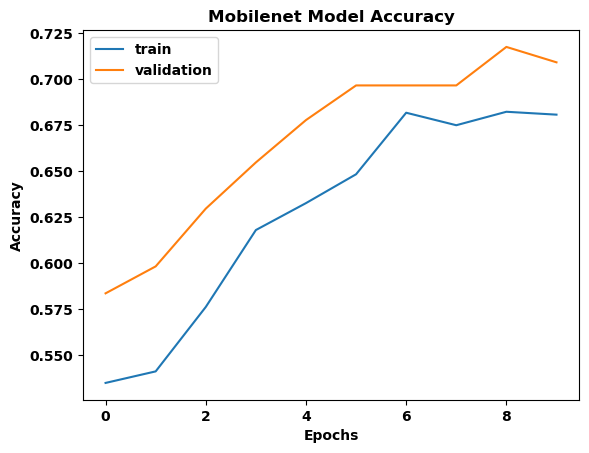

In [26]:
fig1 = plt.gcf()
plt.plot(mobilenet_history.history['accuracy'])
plt.plot(mobilenet_history.history['val_accuracy'])
plt.title('Mobilenet Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'validation'])
plt.show()

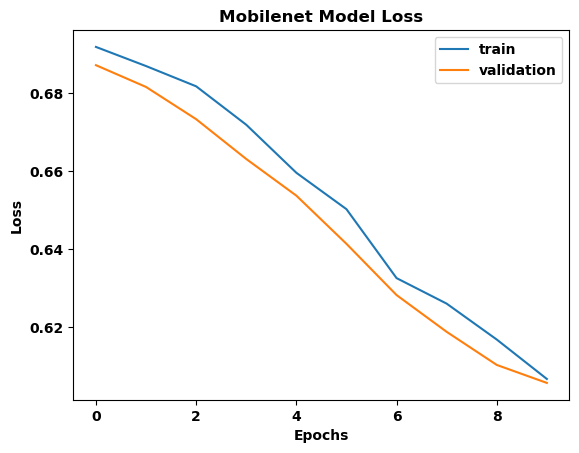

In [27]:
plt.plot(mobilenet_history.history['loss'])
plt.plot(mobilenet_history.history['val_loss'])

plt.title('Mobilenet Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'validation'])
plt.show()

In [28]:
mobilenet_evaluation = evaluate_model(mobilenet_model, test_set)

1/1 [==============================] - 2s 2s/step
[[226  64]
 [101 206]]
F1 score 0.7140381282495667
Accuracy 0.7236180904522613


In [29]:
mobile_model_path = '../Final_model/mobile_model.h5'
pickle.dump(mobilenet_model, open(mobile_model_path, 'wb'))
mobilenet_model.save_weights(mobile_model_path)
mobile_model_size = format((os.path.getsize(mobile_model_path)/(1024*1024)),".2f")
print("Resnet Model:",mobile_model_size,"MB")

INFO:tensorflow:Assets written to: ram://b62196ff-7b76-4e7f-a538-322e535c3947/assets


INFO:tensorflow:Assets written to: ram://b62196ff-7b76-4e7f-a538-322e535c3947/assets


Resnet Model: 13.96 MB
